In [6]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data = pd.read_csv('/content/drive/MyDrive/UnB/IEEE Computational Intelligence Society, UnB/Trainee/Dataset/Período 2/winequality.csv')

In [8]:
print(data.shape)

(6497, 14)


In [9]:
data.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,0,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6,1
1,1,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6,1
2,2,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6,0
3,3,6.6,0.23,0.26,1.3,0.045,16.0,128.0,0.99340,3.36,0.60,10.0,6,0
4,4,7.2,0.24,0.29,3.0,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6,0


In [10]:
data = data.drop(columns="Unnamed: 0")
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_is_red           6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [12]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_is_red             0
dtype: int64

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


Text(0, 0.5, 'Numero de Ocorrencias')

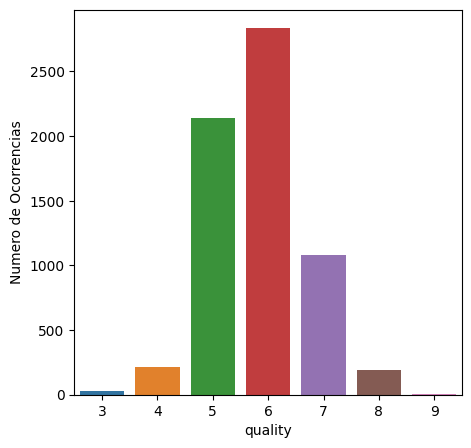

In [13]:
print(data['quality'].value_counts())
plt.figure(figsize = (5, 5))
sns.countplot(x = data['quality'])
plt.xlabel("quality")
plt.ylabel("Numero de Ocorrencias")

0    4898
1    1599
Name: wine_is_red, dtype: int64


Text(0, 0.5, 'Numero de Ocorrencias')

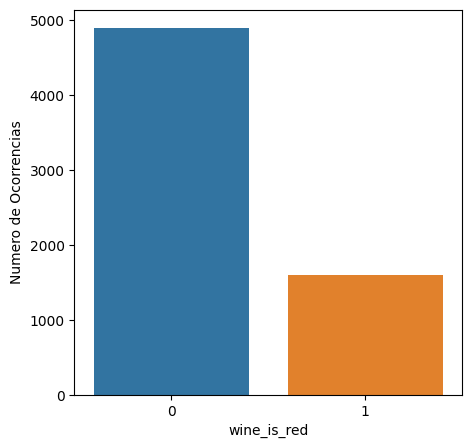

In [14]:
print(data['wine_is_red'].value_counts())
plt.figure(figsize = (5, 5))
sns.countplot(x = data['wine_is_red'])
plt.xlabel("wine_is_red")
plt.ylabel("Numero de Ocorrencias")

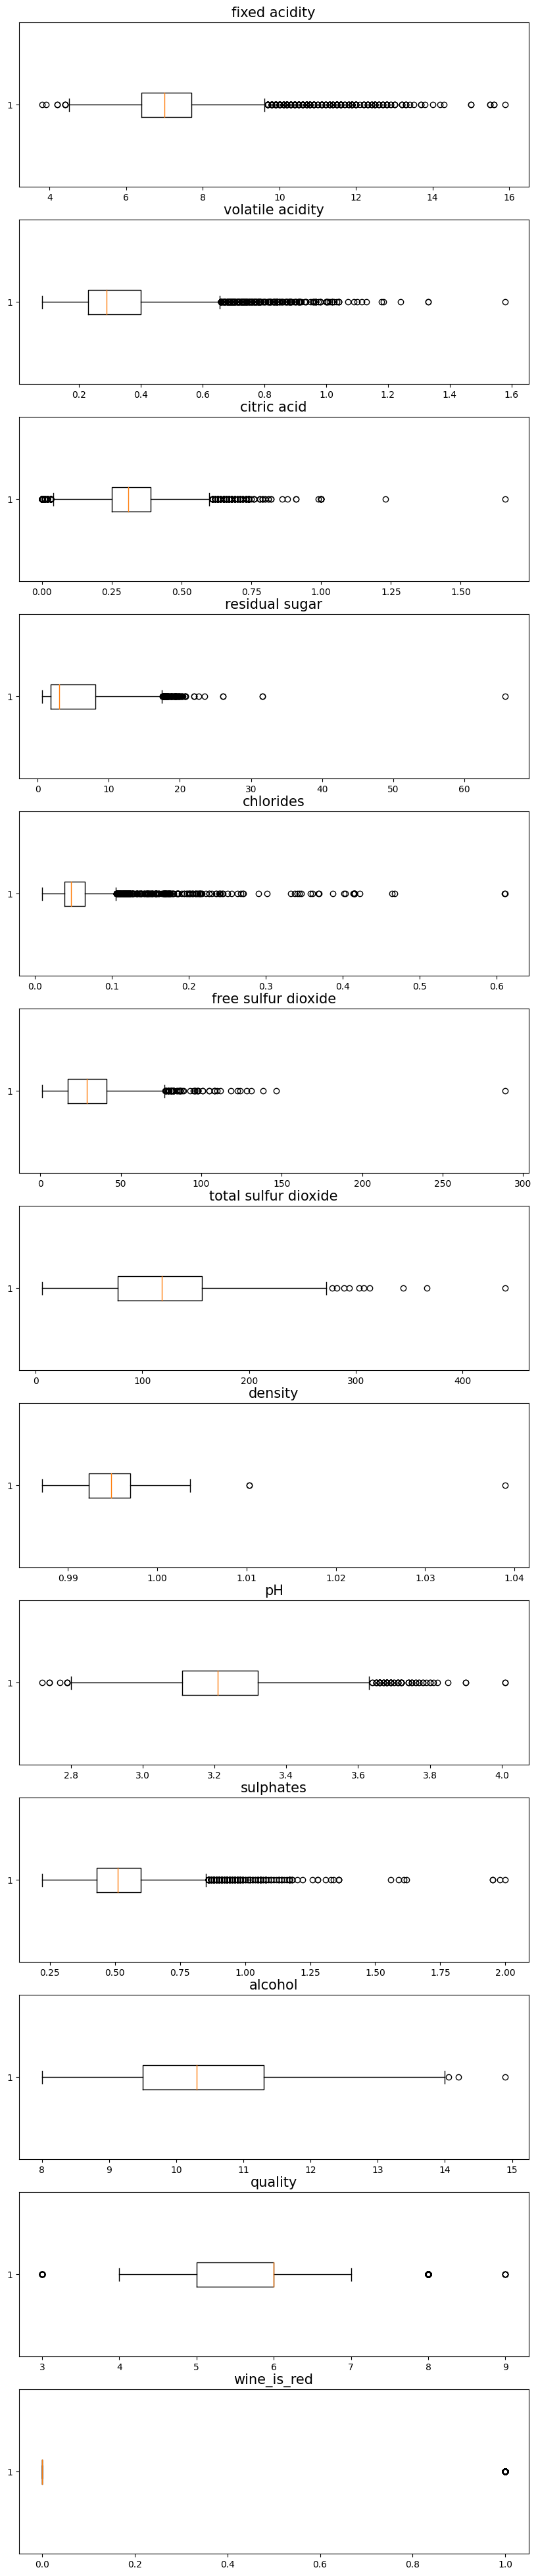

In [15]:
col = data.columns
fgi, ax = plt.subplots(len(data.columns),1 , figsize = (10,50))
for ind, axi in enumerate(ax.flat):
    axi.boxplot(data[col[ind]], vert = False)
    axi.set_title(col[ind], size = 15)

<Axes: >

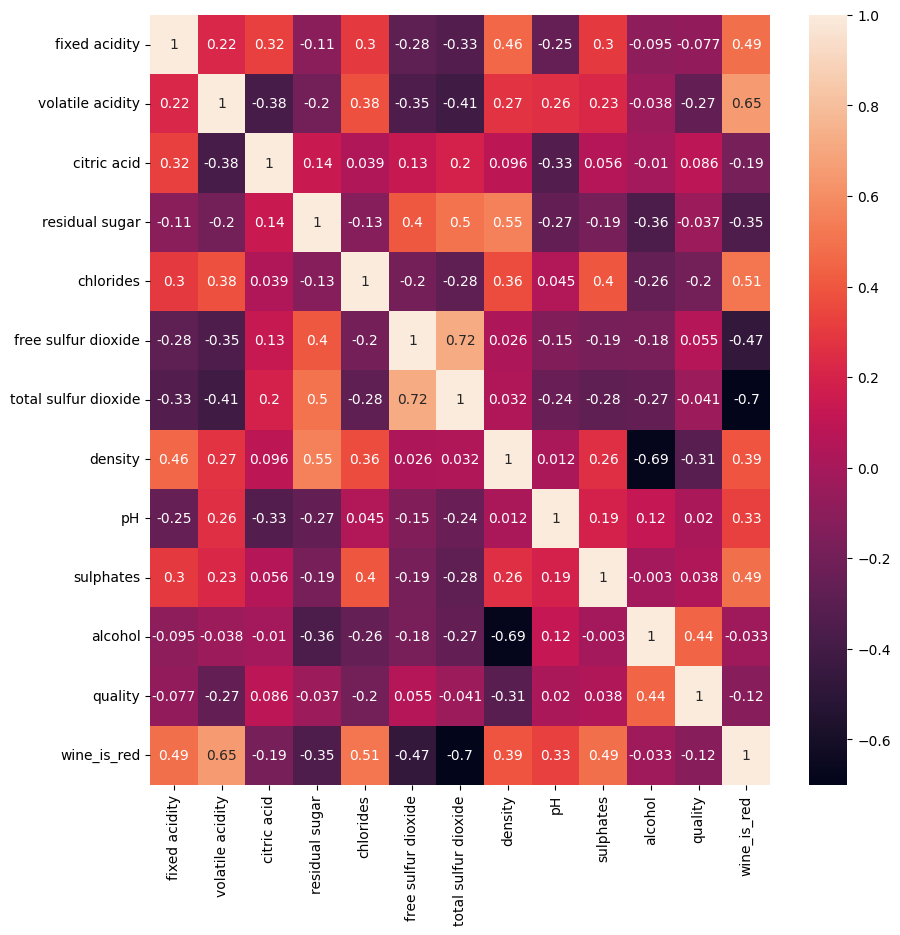

In [16]:
correl = data.corr()
plt.figure(figsize =  (10,10))
sns.heatmap(correl, annot = True)

In [17]:
print(correl['quality'].sort_values(ascending = False))

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
wine_is_red            -0.119323
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


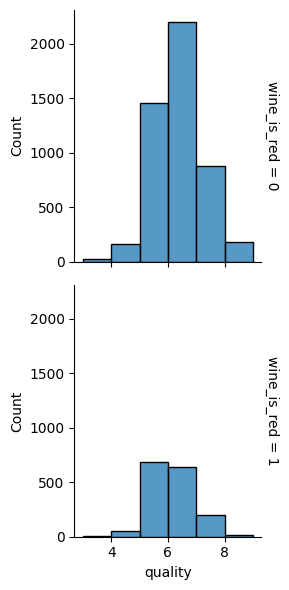

In [18]:
sns.displot(
    data, x="quality", row="wine_is_red",
    binwidth=1, height=3, facet_kws=dict(margin_titles=True),
)

<Axes: xlabel='quality', ylabel='Percent'>

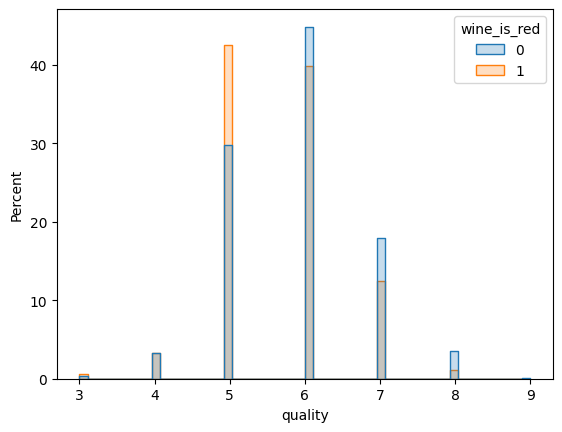

In [19]:

sns.histplot(
    data, x="quality", hue="wine_is_red", element="step",
    stat="percent", common_norm=False,
)

In [20]:
data.groupby("wine_is_red").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
wine_is_red,,,,,,,,,,,,
0,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
1,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023


In [21]:
data.groupby("wine_is_red").std()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
wine_is_red,,,,,,,,,,,,
0,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
1,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569


In [22]:
data_np = data.to_numpy()
print(data_np.min(axis=0))
print(data_np.max(axis=0))
dataNormal_np = data_np-data_np.min(axis=0)
dataNormal_np = dataNormal_np/dataNormal_np.max(axis=0)
print(dataNormal_np.min(axis=0))
print(dataNormal_np.max(axis=0))

[3.8     0.08    0.      0.6     0.009   1.      6.      0.98711 2.72
 0.22    8.      3.      0.     ]
[ 15.9       1.58      1.66     65.8       0.611   289.      440.
   1.03898   4.01      2.       14.9       9.        1.     ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [23]:
class Ponto:

    def __init__(self,posicao,indice, distancia, is_red):
      self.posicao =  posicao
      self.indice = indice
      self.distancia = distancia
      self.is_red = is_red

'''def distancia_euclidiana(v1,v2):
  return np.sqrt(np.sum((v2-v1)**2))'''

def moda(vetor):
  vals,counts = np.unique(vetor, return_counts=True)
  index = np.argmax(counts)
  return vals[index]

def distancia_manhattan(v1,v2):
  return np.sum(np.abs(v2-v1))

def knn(dados,k = 81 , coluna_y = -1, split = 0.7):
    np.random.shuffle(dados)

    treino = np.array(dados[0:int(split*len(dados))])
    #print(treino.shape)

    y_treino = treino[:, -1]
    x_treino = treino[:,:-1]

    teste = np.array(dataNormal_np[int(split*len(dados)):-1])
    #print(teste.shape)

    y_teste = teste[:, -1]
    x_teste = teste[:,:-1]

    ver_pos = 0
    fal_pos = 0
    ver_neg = 0
    fal_neg = 0

    acertos = 0
    erros = 0
    for i in range(len(x_treino)):
      Pontos = []
      for j in range(len(x_teste)):
          Pontos.append(Ponto(x_teste[j],j,distancia_manhattan(x_treino[i],x_teste[j]),y_teste[j]))
      Pontos.sort(key=lambda x: x.distancia, reverse=False)
      KNN = []
      for a in range(k):
        KNN.append(Pontos[a].is_red)
      KNN = np.array(KNN)
      previsao = moda(KNN)
      if previsao == y_teste[Pontos[a].indice]:
        acertos += 1
        if previsao == 1:
          ver_pos +=1
        else:
          ver_neg += 1

      else:
        erros += 1
        if previsao == 1:
          fal_pos += 1
        else:
          fal_neg += 1

    return [acertos,erros,ver_pos,fal_pos,ver_neg, fal_neg]



In [24]:
acuracia_KNN_manual = knn(data_np)
print(f"A acurácia do modelo KNN manual para a previsão do vinho tinto foi de {100*(acuracia_KNN_manual[0])/(acuracia_KNN_manual[0]+acuracia_KNN_manual[1])}% para o caso dos dados NÃO normalizados")
precision_KNN_manual = acuracia_KNN_manual[2]/(acuracia_KNN_manual[2]+acuracia_KNN_manual[3])
print(f'Precision: {100*precision_KNN_manual}%')
recall_KNN_manual = acuracia_KNN_manual[2]/(acuracia_KNN_manual[2]+acuracia_KNN_manual[5])
print(f'Recall: {100*recall_KNN_manual}%')
conf_mat_KNN_manual = np.array([[acuracia_KNN_manual[2],acuracia_KNN_manual[3]],[acuracia_KNN_manual[4],acuracia_KNN_manual[5]]])
print(conf_mat_KNN_manual)

A acurácia do modelo KNN manual para a previsão do vinho tinto foi de 75.14844952716076% para o caso dos dados NÃO normalizados
Precision: 42.857142857142854%
Recall: 1.0657193605683837%
[[  12   16]
 [3405 1114]]


In [25]:
acuracia_KNN_manual_Normalizado = knn(dataNormal_np)
print(f"A acurácia do modelo KNN manual para a previsão do vinho tinto foi de {100*(acuracia_KNN_manual_Normalizado[0])/(acuracia_KNN_manual_Normalizado[0]+acuracia_KNN_manual_Normalizado[1])}% para o caso dos dados normalizados")
precision_KNN_manual_Normalizado = acuracia_KNN_manual_Normalizado[2]/(acuracia_KNN_manual_Normalizado[2]+acuracia_KNN_manual_Normalizado[3])
print(f'Precision: {100*precision_KNN_manual_Normalizado}%')
recall_KNN_manual_Normalizado = acuracia_KNN_manual_Normalizado[2]/(acuracia_KNN_manual_Normalizado[2]+acuracia_KNN_manual_Normalizado[5])
print(f'Recall: {100*recall_KNN_manual_Normalizado}%')
conf_mat_KNN_manual_Normalizado = np.array([[acuracia_KNN_manual_Normalizado[2],acuracia_KNN_manual_Normalizado[3]],[acuracia_KNN_manual_Normalizado[4],acuracia_KNN_manual_Normalizado[5]]])
print(conf_mat_KNN_manual_Normalizado)

A acurácia do modelo KNN manual para a previsão do vinho tinto foi de 95.29360017594018% para o caso dos dados normalizados
Precision: 87.16279069767442%
Recall: 92.49753208292202%
[[ 937  138]
 [3396   76]]
